**IMPORTANT**

Since sharing this document on YouTube, some very helpful comments have come in. Since then, we have lagged the price for the strategy to the following days Open. This has made a huge difference (lowering expected returns).

**Downloads**

In [ ]:
!pip install hmmlearn
!pip install yfinance

**Imports**

In [ ]:
import pandas as pd
import numpy as np
import sklearn.mixture as mix
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import yfinance as yf


import pandas_ta as ta
# Machine Learning
from hmmlearn.hmm import GaussianHMM

**Data Extraction**

In [ ]:
# Data Extraction
start_date = "2017-01-1"
end_date = "2022-06-01"
symbol = "SPY"
data = yf.download(symbol, start=start_date, end=end_date)
data = data[["open", "high", "low", "close", "volume"]]
data.head(3)

In [ ]:
# Create a copy
df = data.copy()
df["Log"] = np.log(df["close"])
df["Returns"] = df["Log"].pct_change()
df["Range"] = (df["high"] / df["low"]) - 1
df.dropna(inplace=True)
df.head()

In [ ]:
pair = 'ALGO_USDT'
timeframe = '4h'

exchange = 'binance'
odf = pd.read_json(f'../freq-user-data/data/{exchange}/{pair}-{timeframe}.json'
# exchange = 'kucoin'
# odf = pd.read_json(f'../../freq-user-data/data/{exchange}/futures/{pair}-{timeframe}-futures.json'
).dropna().set_axis(['timestamp', 'open', 'high', 'low', 'close', 'volume'], axis=1
).assign(dtime=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=False)
).set_index('dtime').sort_index()

print(odf.shape)
odf.head(4)
# odf.shape


In [ ]:
df = odf[['open','high','low','close']].apply(np.log)
df['Returns'] = df.close.diff()
df['Range'] = ta.atr(df.high,df.low,df.close, length=14)
df.dropna(inplace=True,axis=0)
df.head(5)

In [ ]:
# Structure Data
X_train = df[["Returns", "Range"]]
X_train.head()

In [ ]:
# # Fit the GMM model
# gmm_model = mix.GaussianMixture(n_components=4, covariance_type="full", n_init=100, random_state=7).fit(X_train)

In [353]:
# Fit Model
# INITIAL VIDEO SHOWED GMM (above) - BUT HMM SEEMS BETTER?
hmm_model = GaussianHMM(n_components=4, covariance_type="tied", n_iter=100).fit(X_train)
print("Model Score:", hmm_model.score(X_train))

/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Model Score: 49429.555598763545


/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [354]:
# Check results
hidden_states = hmm_model.predict(X_train)
hidden_states[:5]

/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 0, 0, 0, 0])

In [355]:
# Structure prices for chart plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df["close"].values.astype(float)
print("Correct Number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1

Correct Number of rows:  True


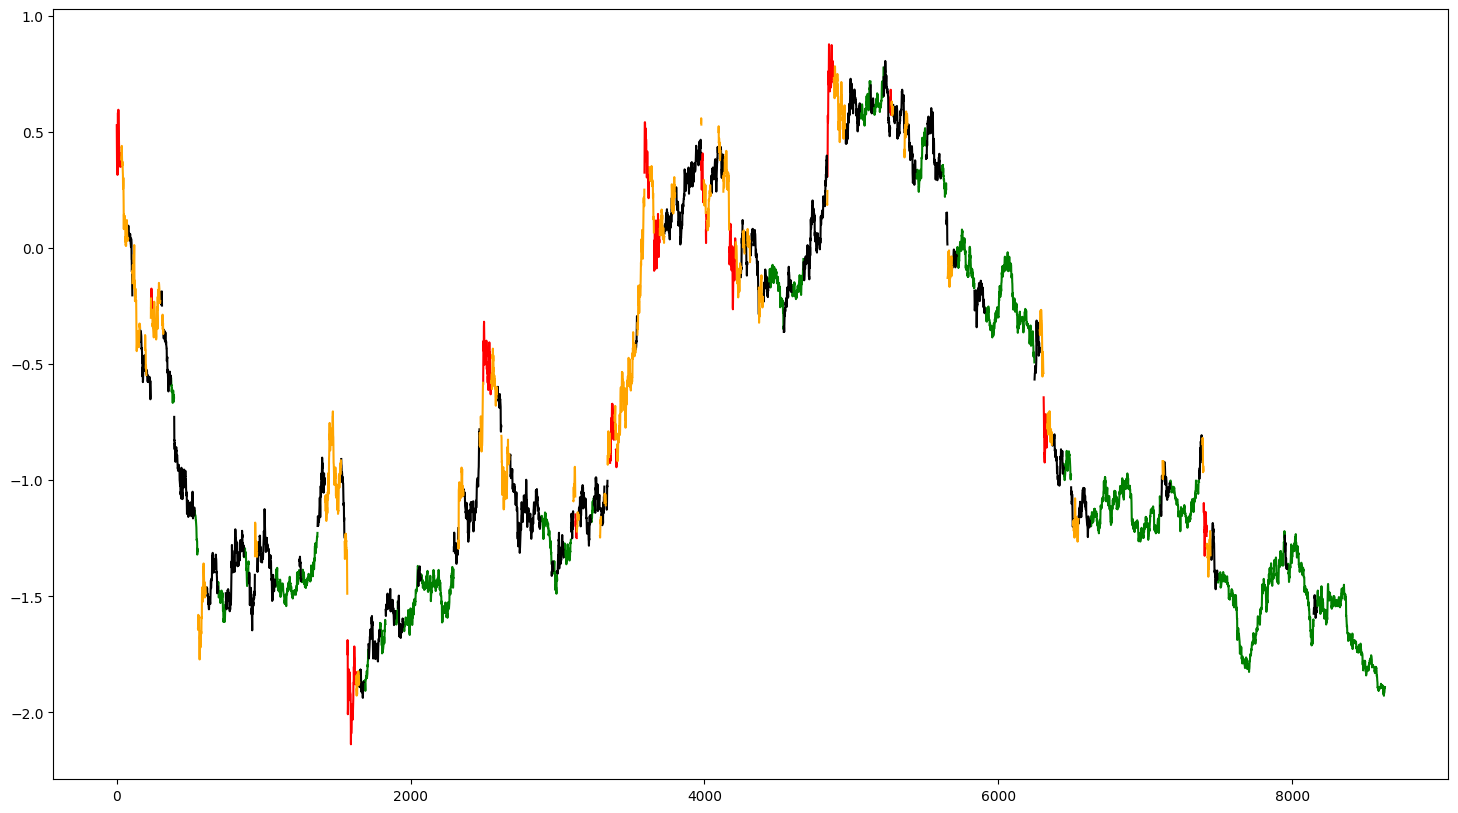

8633


In [356]:
# Plot chart
fig = plt.figure(figsize = (18,10))
plt.plot(labels_0, color="red")
plt.plot(labels_1, color="green")
plt.plot(labels_2, color="black")
plt.plot(labels_3, color="orange")
plt.show()
print(len(labels_0))

In [459]:
# Create the class
class StrategyManager():

    # Initialize the class
    def __init__(self, symbol, timeframe, start_date, end_date):
        # pair = 'ALGO_USDT'
        self.df = self._extract_data(symbol, timeframe, start_date, end_date)
        self.sharpe = 0

    # Extract data
    def _extract_data(self, symbol, timeframe, start_date, end_date):
        # import yfinance as yf
        # data = yf.download(symbol, start=start_date, end=end_date)
        # data = data[["open", "high", "low", "close", "volume"]]
        # data = self._structure_df(data)
        # data = odf[["open", "high", "low", "close", "volume"]].apply(np.log)

        # timeframe = '4h'
        exchange = 'binance'
        data = pd.read_json(f'../freq-user-data/data/{exchange}/{symbol}-{timeframe}.json'
        ).dropna().set_axis(['timestamp', 'open', 'high', 'low', 'close', 'volume'], axis=1
        ).assign(dtime=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=False)
        ).set_index('dtime').sort_index()
        data = self._structure_df(data)
        return data

    # Calculates general period returns and volatility
    def _structure_df(self, df):
        # df = odf[['open','high','low','close']].apply(np.log)
        df['Returns'] = df.close.diff()
        df['Range'] = ta.atr(df.high,df.low,df.close, length=14)
        df.dropna(inplace=True,axis=0)
        # df["Returns"] = df["close"].pct_change()
        # df["Range"] = df["high"] / df["low"] - 1
        df["Bench_C_Rets"], sharpe = self._calculate_returns(df, True)
        self.sharpe = sharpe
        # df.dropna(inplace=True)
        return df

    # Adjusts the signal to represent our strategy
    def _set_multiplier(self, direction):
        if direction == "long":
            pos_multiplier = 1
            neg_multiplier = 0
        elif direction == "long_short":
            pos_multiplier = 1
            neg_multiplier = -1
        else:
            pos_multiplier = 0
            neg_multiplier = -1
        return pos_multiplier, neg_multiplier

    # Calculates returns for equity curve
    def _calculate_returns(self, df, is_benchmark):

        # Calculate multiplier
        if not is_benchmark:
            multiplier_1 = df["Signal"].shift(1)
            multiplier_2 = 1 if "PSignal" not in df.columns else df["PSignal"].shift(1)

            # Assume open price on following day to avoid lookahead bias for close calculation
            # log_rets = np.log(df["open"].shift(-1) / df["open"]) * multiplier_1 * multiplier_2

            log_rets = df.close.diff() * multiplier_1 * multiplier_2
        else:
            # log_rets = np.log(df["close"] / df["close"].shift(1))
            log_rets = df.close.diff()

        # Calculate Sharpe Ratio
        sharpe_ratio = self.sharpe_ratio(log_rets)

        # Calculate Cumulative Returns
        c_log_rets = log_rets.cumsum()
        c_log_rets_exp = np.exp(c_log_rets) - 1

        # Return result and Sharpe ratio
        return c_log_rets_exp, sharpe_ratio

    def sharpe_ratio(self, return_series):
        # N = 255  # Trading days in the year (change to 365 for crypto)
        N = 365*6  # Trading days in the year (change to 365 for crypto)
        rf = 0.005 # Half a percent risk free rare
        mean = return_series.mean() * N -rf
        sigma = return_series.std() * np.sqrt(N)
        sharpe = round(mean / sigma, 3)
        return sharpe

    # Replace Dataframe
    def change_df(self, new_df, drop_cols=[]):
        new_df = new_df.drop(columns=drop_cols)
        self.df = new_df

    # Moving average crossover strategy
    def backtest_ma_crossover(self, period_1, period_2, direction, drop_cols=[]):

        # Set df
        df = self.df

        # Get multipliers
        pos_multiplier, neg_multiplier = self._set_multiplier(direction)

        # Calculate Moving Averages
        if f"MA_{period_1}" or f"MA_{period_2}" not in df.columns:
            df[f"MA_{period_1}"] = df["close"].rolling(window=period_1).mean()
            df[f"MA_{period_2}"] = df["close"].rolling(window=period_2).mean()
            df.dropna(inplace=True)

        # Calculate Benchmark Returns
        df["Bench_C_Rets"], sharpe_ratio_bench = self._calculate_returns(df, True)

        # Calculate Signal
        df.loc[df[f"MA_{period_1}"] > df[f"MA_{period_2}"], "Signal"] = pos_multiplier
        df.loc[df[f"MA_{period_1}"] <= df[f"MA_{period_2}"], "Signal"] = neg_multiplier

        # Calculate Strategy Returns
        df["Strat_C_Rets"], sharpe_ratio_strat = self._calculate_returns(df, False)

        # Get values for output
        bench_rets = df["Bench_C_Rets"].values.astype(float)
        strat_rets = df["Strat_C_Rets"].values.astype(float)
        print("Sense check: ", round(df["close"].values[-1] / df["close"].values[0] - 1, 3), round(bench_rets[-1], 3))

        # Remove irrelevant features
        if len(drop_cols) > 0:
            df = df.drop(columns=drop_cols)

        # Ensure Latest DF matches
        df = df.dropna()
        self.df = df

        # Return df
        return df, sharpe_ratio_bench, sharpe_ratio_strat

**Base Strategy**

In [519]:
# Create an instance
symbol='ALGO_USDT'
timeframe='8h'
strat_mgr = StrategyManager(symbol, timeframe, start_date, end_date)

In [520]:
# Extract the modified data
df_strat_mgr = strat_mgr.df
df_strat_mgr.tail()

,timestamp,open,high,low,close,volume,Returns,Range,Bench_C_Rets
dtime,,,,,,,,,
2023-05-31 16:00:00,1685548800000,0.1468,0.1480,0.1456,0.1477,8136823.0,0.0010,0.002885,-0.764796
2023-06-01 00:00:00,1685577600000,0.1478,0.1489,0.1446,0.1454,11218169.0,-0.0023,0.002986,-0.765336
2023-06-01 08:00:00,1685606400000,0.1454,0.1475,0.1454,0.1471,6193886.0,0.0017,0.002923,-0.764937
2023-06-01 16:00:00,1685635200000,0.1470,0.1486,0.1465,0.1482,6741904.0,0.0011,0.002864,-0.764678
2023-06-02 00:00:00,1685664000000,0.1482,0.1513,0.1467,0.1502,8014654.0,0.0020,0.002988,-0.764207


In [521]:
# Check MA Strategy performance
strat_df, sharpe_b, sharpe_s = strat_mgr.backtest_ma_crossover(12, 21, "long", drop_cols=["high", "low", "volume"])
strat_df

Sense check:  -0.865 -0.617


,timestamp,open,close,Returns,Range,Bench_C_Rets,MA_12,MA_21,Signal,Strat_C_Rets
dtime,,,,,,,,,,
2019-07-03 16:00:00,1562169600000,1.1100,1.1100,0.0000,0.150627,0.000000,1.268000,1.359952,0.0,0.000000
2019-07-04 00:00:00,1562198400000,1.1100,1.0250,-0.0850,0.148297,-0.081488,1.228583,1.335333,0.0,0.000000
2019-07-04 08:00:00,1562227200000,1.0230,1.0100,-0.0150,0.143132,-0.095163,1.194000,1.312143,0.0,0.000000
2019-07-04 16:00:00,1562256000000,1.0100,1.0100,0.0000,0.138123,-0.095163,1.157417,1.292667,0.0,0.000000
2019-07-05 00:00:00,1562284800000,1.0090,1.0740,0.0640,0.142614,-0.035360,1.131000,1.272619,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-05-31 16:00:00,1685548800000,0.1468,0.1477,0.0010,0.002885,-0.617987,0.150442,0.150219,1.0,0.043834
2023-06-01 00:00:00,1685577600000,0.1478,0.1454,-0.0023,0.002986,-0.618864,0.149958,0.149986,0.0,0.041435
2023-06-01 08:00:00,1685606400000,0.1454,0.1471,0.0017,0.002923,-0.618216,0.149617,0.149843,0.0,0.041435


Sharpe Ratio Base Strategy Benchmark:  -0.325
Sharpe Ratio Base Strategy:  0.014


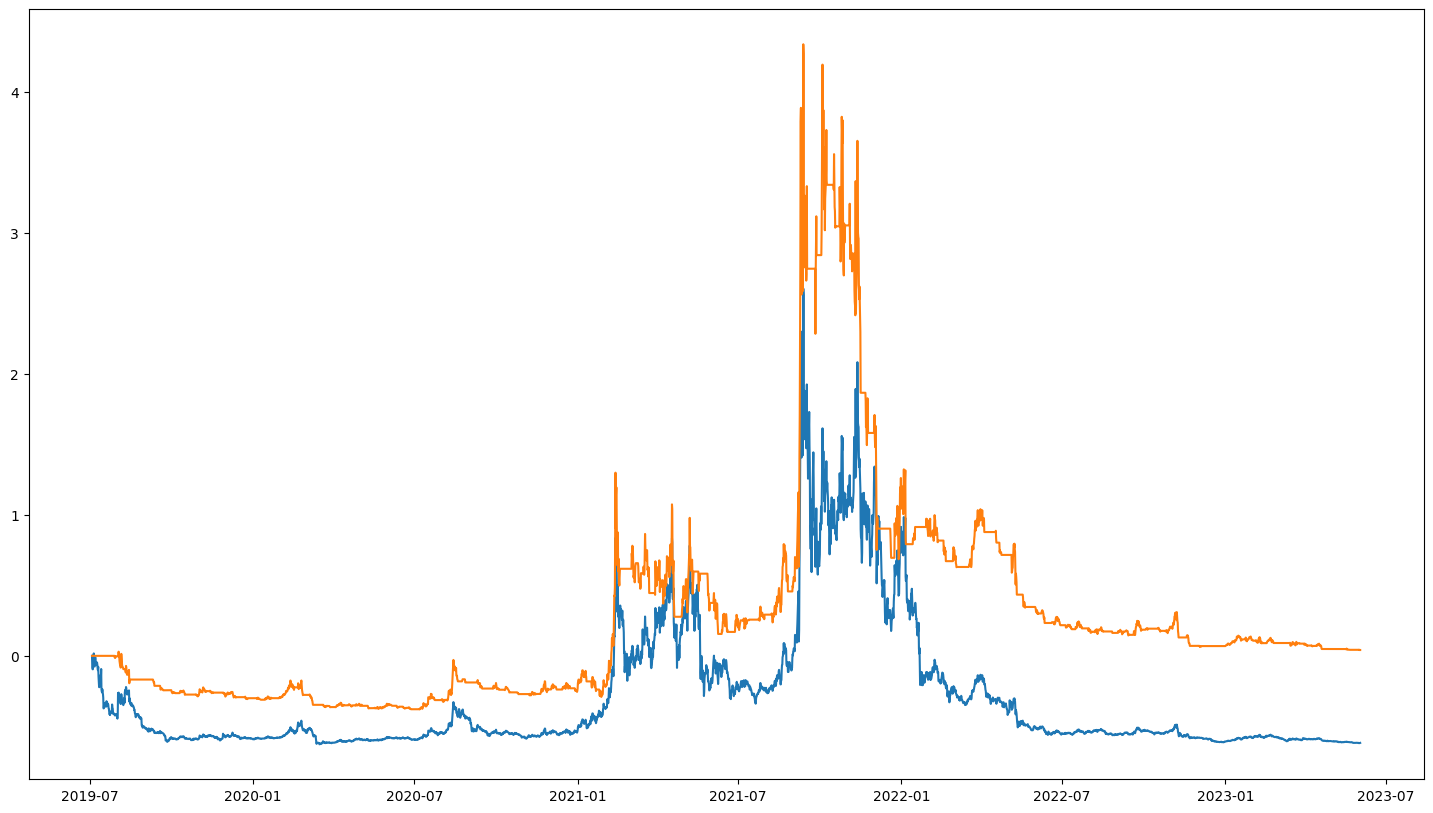

In [522]:
# Review equity curve and metrics
print("Sharpe Ratio Base Strategy Benchmark: ", sharpe_b)
print("Sharpe Ratio Base Strategy: ", sharpe_s)

fig = plt.figure(figsize = (18,10))
plt.plot(strat_df["Bench_C_Rets"])
plt.plot(strat_df["Strat_C_Rets"])
plt.show()

**Base Strategy Plus Market Regimes**

In [523]:
strat_df.head(5)

,timestamp,open,close,Returns,Range,Bench_C_Rets,MA_12,MA_21,Signal,Strat_C_Rets
dtime,,,,,,,,,,
2019-07-03 16:00:00,1562169600000,1.110,1.110,0.000,0.150627,0.000000,1.268000,1.359952,0.0,0.0
2019-07-04 00:00:00,1562198400000,1.110,1.025,-0.085,0.148297,-0.081488,1.228583,1.335333,0.0,0.0
2019-07-04 08:00:00,1562227200000,1.023,1.010,-0.015,0.143132,-0.095163,1.194000,1.312143,0.0,0.0
2019-07-04 16:00:00,1562256000000,1.010,1.010,0.000,0.138123,-0.095163,1.157417,1.292667,0.0,0.0
2019-07-05 00:00:00,1562284800000,1.009,1.074,0.064,0.142614,-0.035360,1.131000,1.272619,0.0,0.0


In [524]:
# Structure Data
X_train_2 = strat_df[["Returns", "Range"]].iloc[:500] # Train Test Split here
X_test = strat_df[["Returns", "Range"]].iloc[500:]
X_train_2.head()
df_strat_mgr_test = strat_df.copy()
len(X_train_2)

500

In [525]:
# Fit Model
hmm_model = GaussianHMM(n_components=4, covariance_type="spherical", n_iter=200).fit(X_train_2)
print("Model Score:", hmm_model.score(X_train_2))

Model Score: 3014.928131349746


/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/grenada/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

In [526]:
# Predict Market Regimes
hidden_states_preds = hmm_model.predict(X_test.values)
hidden_states_preds[:10]
len(hidden_states_preds)

3789

In [537]:
# Set Favourable States - !!!!!!!!! ADJUST BASED ON HMM RESULTS AND TEST OUTCOME !!!!!!!!!!!!!!!!!!!!
favourable_states = [2]

In [538]:
# Write Strategy
state_signals = []
for s in hidden_states_preds:
    if s in favourable_states:
        state_signals.append(1)
    else:
        state_signals.append(0)
print("States: ", state_signals[:10])
print("Lengh of States: ", len(state_signals))

States:  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Lengh of States:  3789


In [539]:
# Replace Strategy Dataframe
df_strat_mgr_test = df_strat_mgr_test.tail(len(X_test))
df_strat_mgr_test["PSignal"] = state_signals
strat_mgr.change_df(df_strat_mgr_test)
strat_mgr.df.head()

,timestamp,open,close,Returns,Range,Bench_C_Rets,MA_12,MA_21,Signal,Strat_C_Rets,PSignal
dtime,,,,,,,,,,,
2019-12-17 08:00:00,1576569600000,0.2388,0.2302,-0.0089,0.014123,-0.585134,0.255742,0.265129,0.0,-0.292912,1
2019-12-17 16:00:00,1576598400000,0.2304,0.2187,-0.0115,0.014293,-0.589878,0.251308,0.262462,0.0,-0.292912,0
2019-12-18 00:00:00,1576627200000,0.2187,0.2197,0.0010,0.014393,-0.589467,0.247025,0.259476,0.0,-0.292912,0
2019-12-18 08:00:00,1576656000000,0.2197,0.2320,0.0123,0.014915,-0.584387,0.245317,0.256976,0.0,-0.292912,0
2019-12-18 16:00:00,1576684800000,0.2321,0.2447,0.0127,0.015121,-0.579075,0.244683,0.254976,0.0,-0.292912,0


In [540]:
strat_df_2, sharpe_b_2, sharpe_s_2 = strat_mgr.backtest_ma_crossover(14, 21, "long")
strat_df_2

Sense check:  -0.357 -0.08


,timestamp,open,close,Returns,Range,Bench_C_Rets,MA_12,MA_21,Signal,Strat_C_Rets,PSignal,MA_14
dtime,,,,,,,,,,,,
2019-12-24 08:00:00,1577174400000,0.2336,0.2352,0.0017,0.011287,0.001701,0.241775,0.237171,1.0,0.000000,0,0.240643
2019-12-24 16:00:00,1577203200000,0.2352,0.2306,-0.0046,0.010952,-0.002896,0.241000,0.237738,1.0,0.000000,0,0.240686
2019-12-25 00:00:00,1577232000000,0.2312,0.2313,0.0007,0.010727,-0.002198,0.240525,0.238290,1.0,0.000000,0,0.240229
2019-12-25 08:00:00,1577260800000,0.2312,0.2285,-0.0028,0.010503,-0.004988,0.240125,0.238124,1.0,0.000000,0,0.239414
2019-12-25 16:00:00,1577289600000,0.2285,0.2275,-0.0010,0.010017,-0.005982,0.239083,0.237305,1.0,0.000000,0,0.238736
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 16:00:00,1685548800000,0.1468,0.1477,0.0010,0.002885,-0.082222,0.150442,0.150219,1.0,-0.301765,0,0.150400
2023-06-01 00:00:00,1685577600000,0.1478,0.1454,-0.0023,0.002986,-0.084331,0.149958,0.149986,1.0,-0.301765,0,0.150086
2023-06-01 08:00:00,1685606400000,0.1454,0.1471,0.0017,0.002923,-0.082773,0.149617,0.149843,0.0,-0.301765,0,0.149843


Sharpe Ratio Benchmark:  -0.034
Sharpe Ratio Regime Strategy with MA Cross:  -0.204
--- ---
Returns Benchmark: -7.99%
Returns Regime Strategy with MA Cross: -30.18%


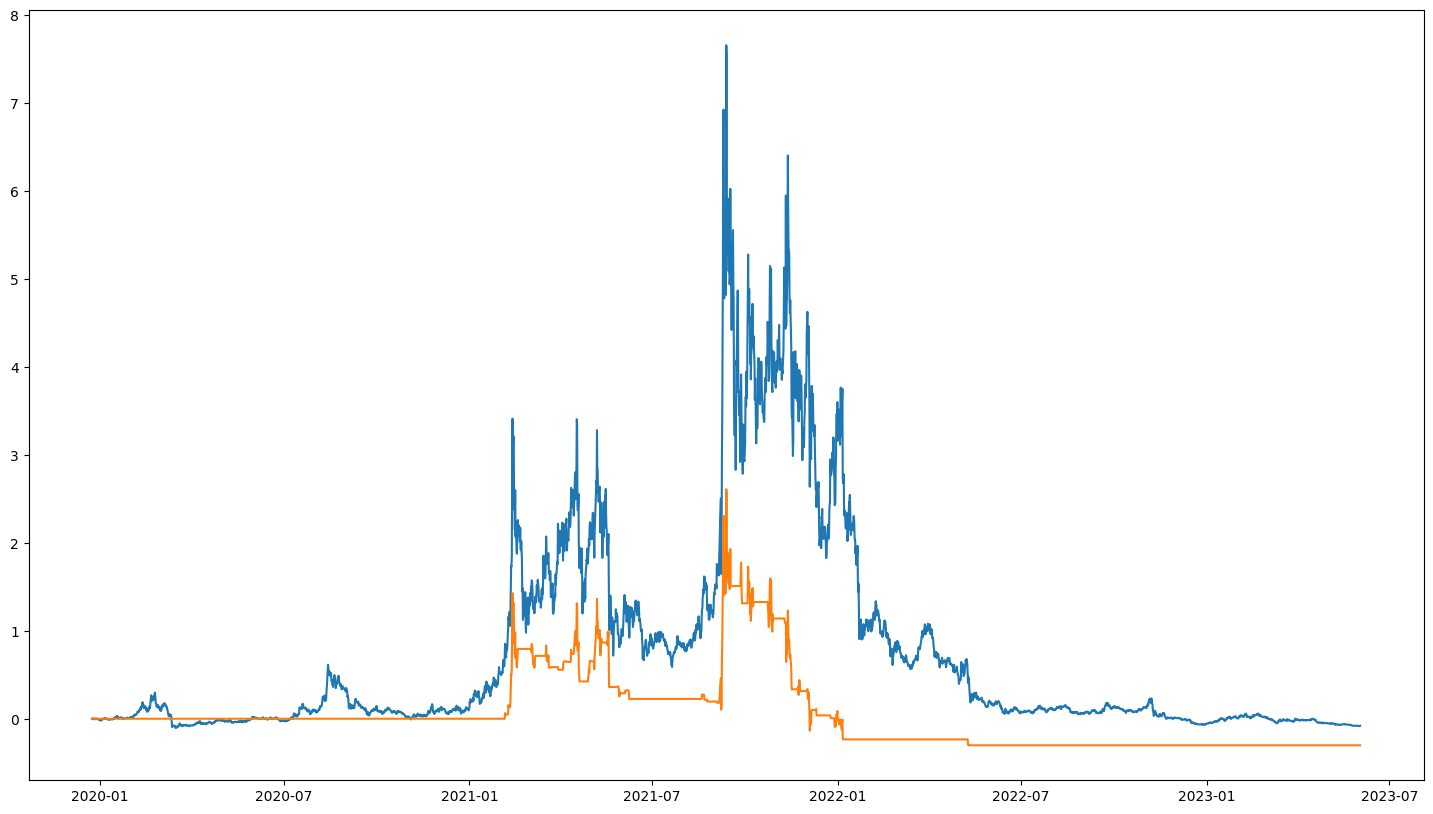

In [541]:
# Review equity curve
print("Sharpe Ratio Benchmark: ", sharpe_b_2)
print("Sharpe Ratio Regime Strategy with MA Cross: ", sharpe_s_2)
print("--- ---")
print(f"Returns Benchmark: {round(strat_df_2['Bench_C_Rets'].values[-1] * 100, 2)}%")
print(f"Returns Regime Strategy with MA Cross: {round(strat_df_2['Strat_C_Rets'].values[-1] * 100, 2)}%")

fig = plt.figure(figsize = (18, 10))
plt.plot(strat_df_2["Bench_C_Rets"])
plt.plot(strat_df_2["Strat_C_Rets"])
plt.show()

**RESOURCES**

https://www.quantstart.com/articles/market-regime-detection-using-hidden-markov-models-in-qstrader/